In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/enhanced-dummy/Enhanced_Dummy_HBL_Data.xlsx


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data = pd.read_excel('/kaggle/input/enhanced-dummy/Enhanced_Dummy_HBL_Data.xlsx')


In [33]:
data

,Region,Subregion,Area,Branch,Account Type,Transaction To,Credit,Debit
0,Lahore,Lahore1,Model Town,MT Branch 1,Current,Mezan,9.664017e+06,0.000000e+00
1,Lahore,Lahore3,Model Town,MT Branch 1,Business,Lahore4,0.000000e+00,1.567210e+06
2,Lahore,Lahore4,Model Town,MT Branch 1,Business,Lahore4,1.707974e+06,0.000000e+00
3,Lahore,Lahore1,Model Town,MT Branch 1,Current,Lahore3,0.000000e+00,4.988621e+06
4,Lahore,Lahore3,Model Town,MT Branch 1,Business,MCB,9.955057e+06,0.000000e+00
...,...,...,...,...,...,...,...,...
83,Karachi,Karachi2,North Nazimabad,Nazimabad Branch 2,Current,Karachi3,4.546101e+06,0.000000e+00
84,Karachi,Karachi3,North Nazimabad,Nazimabad Branch 2,Current,Askari,0.000000e+00,3.528810e+06
85,Karachi,Karachi4,North Nazimabad,Nazimabad Branch 2,Current,Alfalah,7.396254e+06,0.000000e+00
86,Karachi,Karachi3,North Nazimabad,Nazimabad Branch 2,Business,Karachi3,2.961133e+06,0.000000e+00


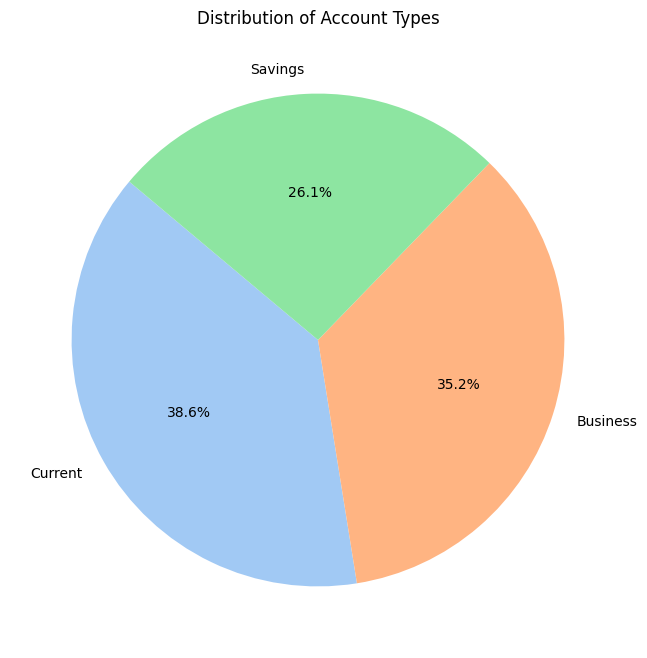

In [35]:
#Task 1:
account_type_counts = data['Account Type'].value_counts()
#Pie Chart
plt.figure(figsize=(8, 8))  
plt.pie(
    account_type_counts, 
    labels=account_type_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,     
    colors=sns.color_palette('pastel')  
)
plt.title('Distribution of Account Types')
plt.show()

In [37]:
# Explanation:
# This pie chart shows how different account types are spread out in the dataset. It highlights the share of each account type, making it easy to see which ones are the most common. For example, if one type stands out, it might suggest a popular choice among customers or a focus area for the business.
# Insights:
#This helps identify which account types are most common and their share in the total dataset.

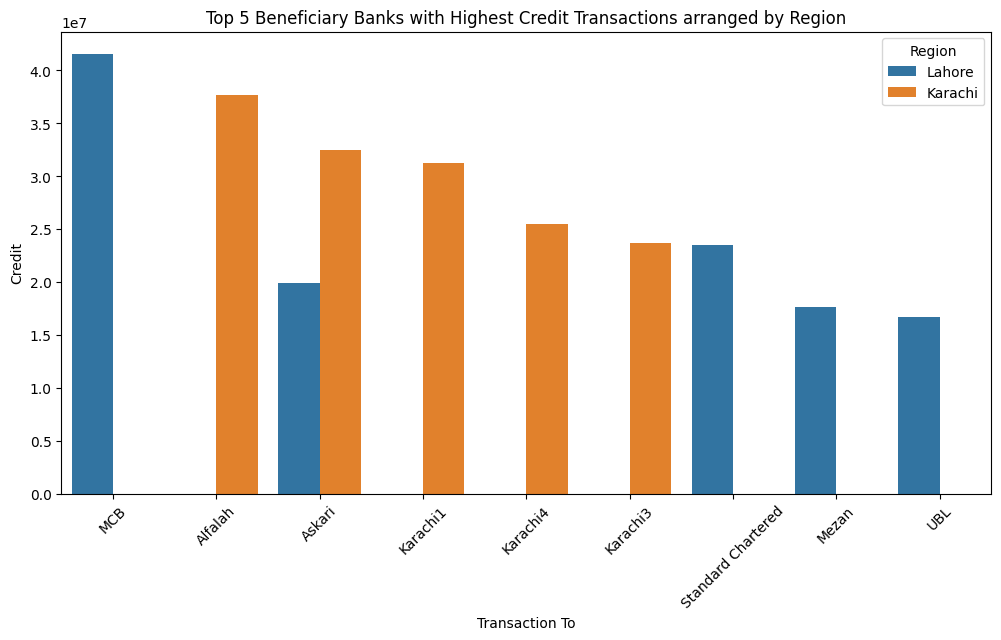

In [38]:
# Task 2: 
top_banks = data.groupby(['Region', 'Transaction To'])['Credit'].sum().reset_index()
top_banks = top_banks.sort_values(by='Credit', ascending=False).groupby('Region').head(5)

# BAR CHART
plt.figure(figsize=(12, 6))
sns.barplot(data=top_banks, x='Transaction To', y='Credit', hue='Region')
plt.title('Top 5 Beneficiary Banks with Highest Credit Transactions arranged by Region')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

In [40]:
# Explanation:
# This bar chart shows the top 5 banks in each region that receive the most credit transactions. It helps us understand which banks are preferred in different regions and are used the most for credit transactions.
# Insights:
#the bar chart allows for a direct comparison of beneficiary banks within each region and across regions.
#This could be useful for identifying key beneficiary banks in each region for targeted financial strategies

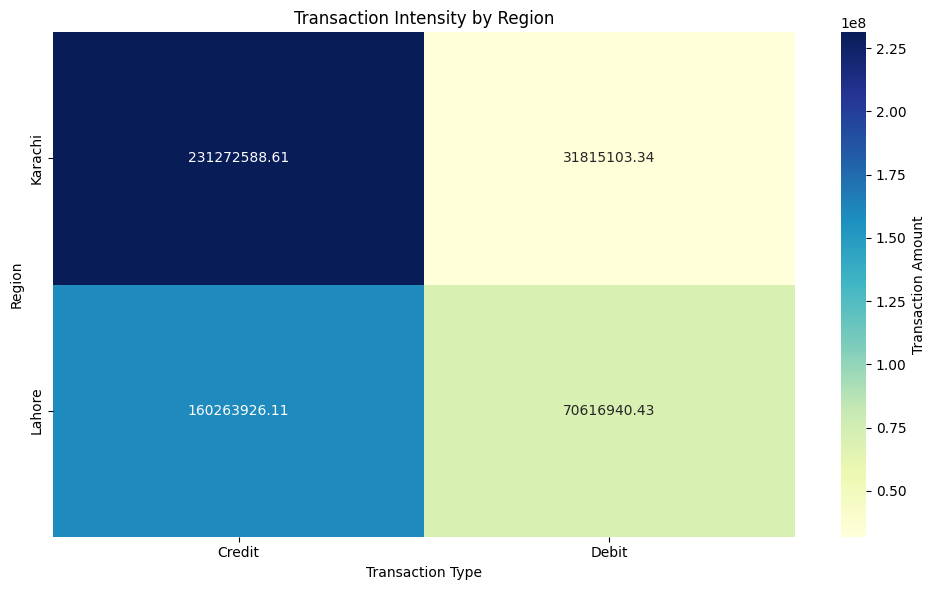

In [41]:
#Task 3:
transaction_data = data.groupby('Region')[['Credit', 'Debit']].sum()

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    transaction_data,
    annot=True,          
    fmt='.2f',           
    cmap='YlGnBu',       
    cbar_kws={'label': 'Transaction Amount'} 
)
plt.title('Transaction Intensity by Region')
plt.xlabel('Transaction Type')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [44]:
# Explanation:  
# This heatmap displays the total Credit and Debit transaction amounts for each region. Each cell shows the transaction volume for a region, with darker colors representing higher amounts. It helps highlight the regions with the most financial activity in Credit and Debit transactions.
# Insights: 
# By highlighting outliers, we can spot unusually high or low transactions, which may suggest errors, fraud, or special cases. The scatter plot clearly shows the difference between regular data and anomalies.

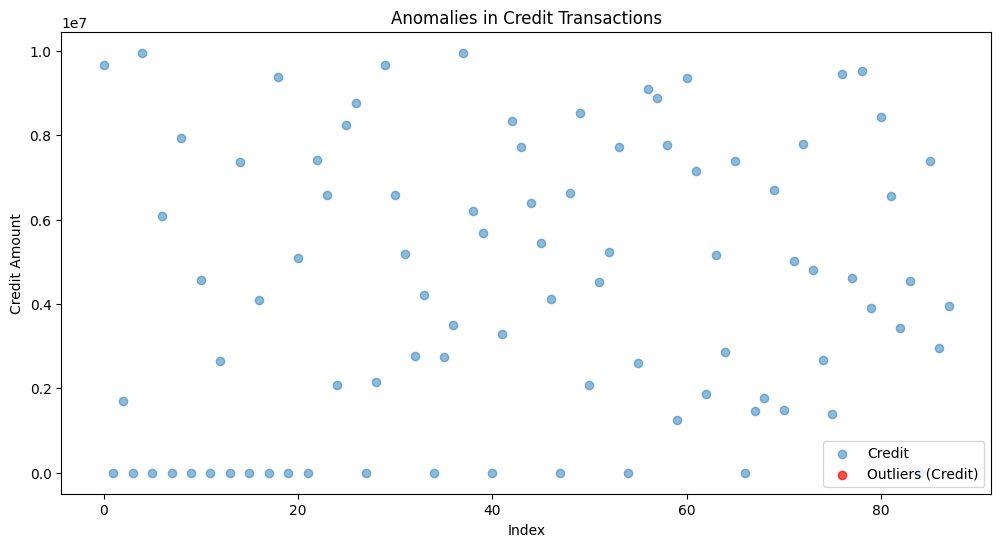

In [45]:
# Task 4: 

data['Credit_Z'] = (data['Credit'] - data['Credit'].mean()) / data['Credit'].std()
data['Debit_Z'] = (data['Debit'] - data['Debit'].mean()) / data['Debit'].std()

outliers_credit = data[data['Credit_Z'].abs() > 3]
outliers_debit = data[data['Debit_Z'].abs() > 3]

# SCATTER PLOT
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['Credit'], label='Credit', alpha=0.5)
plt.scatter(outliers_credit.index, outliers_credit['Credit'], color='red', label='Outliers (Credit)', alpha=0.7)
plt.title('Anomalies in Credit Transactions')
plt.xlabel('Index')
plt.ylabel('Credit Amount')
plt.legend()
plt.show()


In [46]:
# Explanation: This scatter plot identifies anomalies in credit transactions by highlighting outliers in red. Outliers can indicate unusual transaction behavior, which may warrant further investigation for fraud detection or error correction.

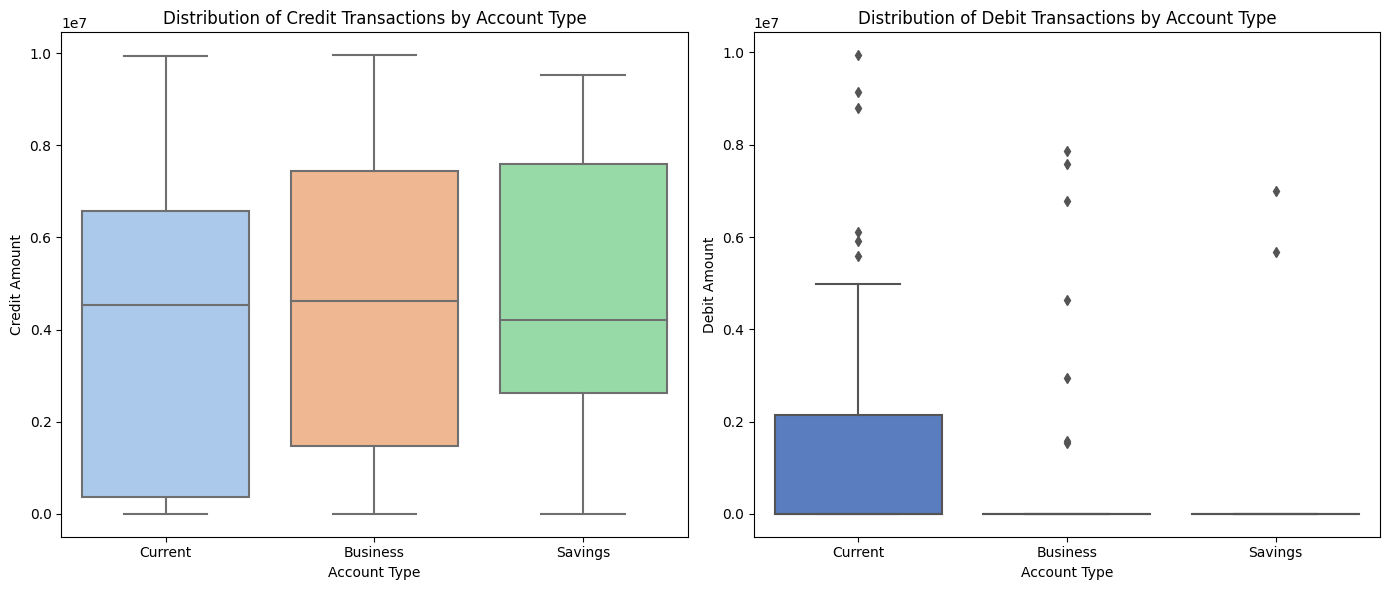

In [47]:
# Task 5
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

#BOX PLOT
sns.boxplot(data=data, x='Account Type', y='Credit', palette='pastel')
plt.title('Distribution of Credit Transactions by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Credit Amount')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Account Type', y='Debit', palette='muted')
plt.title('Distribution of Debit Transactions by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Debit Amount')
plt.tight_layout()
plt.show()

In [48]:
# Explanation:
# This chart shows the median, quartiles, and any outliers for Credit and Debit amounts across different Account Types. The whiskers indicate the range within 1.5 times the interquartile range (IQR). The side-by-side box plots make it simple to compare how Credit and Debit amounts vary.

# Insights:
# This helps identify which account types have higher or lower average Credit or Debit transactions. Account types with a bigger spread show more variation in transaction amounts. Outliers highlight unusual transactions. It also helps spot differences in how Credit and Debit transactions behave for the same account type.

In [49]:
#Task 6 
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'])  
    data = data.dropna(subset=['Time'])  
    if not data.empty:
        data.set_index('Time', inplace=True)
        #Create a LINE CHART
        time_series = data.resample('D')[['Credit', 'Debit']].sum().reset_index()
        if not time_series.empty:
            plt.figure(figsize=(12, 6))
            plt.plot(time_series['Time'], time_series['Credit'], label='Credit', color='blue')
            plt.plot(time_series['Time'], time_series['Debit'], label='Debit', color='red')
            plt.title("Transaction Trends Over Time")
            plt.xlabel("Time")
            plt.ylabel("Transaction Amount")
            plt.legend()
            plt.show()
        else:
            print("Time series data is empty after processing.")
    else:
        print("No valid time data found in the dataset.")
else:
    print("The 'Time' column is not available in the dataset.")

The 'Time' column is not available in the dataset.


In [50]:
# Explanation:  
# This line plot was meant to show trends in credit and debit transactions over time, helping to spot patterns, seasonal changes, or unusual activity. However, since the dataset doesn’t have a 'Time' column, this analysis couldn’t be done. Without time data, it’s not possible to identify or predict future transaction trends based on past activity.

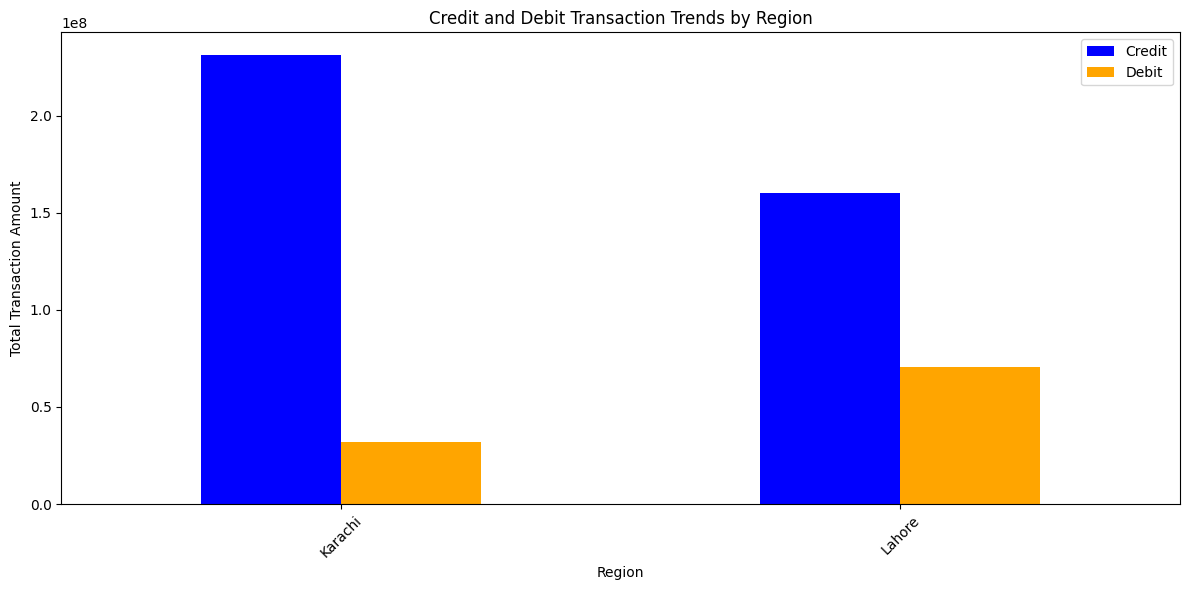

In [51]:
region_grouped = data.groupby('Region')[['Credit', 'Debit']].sum()
region_grouped.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title('Credit and Debit Transaction Trends by Region')
plt.xlabel('Region')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.legend(['Credit', 'Debit'])
plt.tight_layout()
plt.show()

In [53]:
# Explanation:
# This analysis sums up the Credit and Debit amounts for each region to identify regions with the highest and lowest total transaction volumes. It also shows whether regions have more inflows (Credit) or outflows (Debit), providing insights into their overall financial activity.  

# Insights:
# The results help pinpoint high-performing regions and highlight areas that may need more focus or strategy changes, such as underperforming regions or those with significant imbalances between Credit and Debit transactions.

<Figure size 1200x600 with 0 Axes>

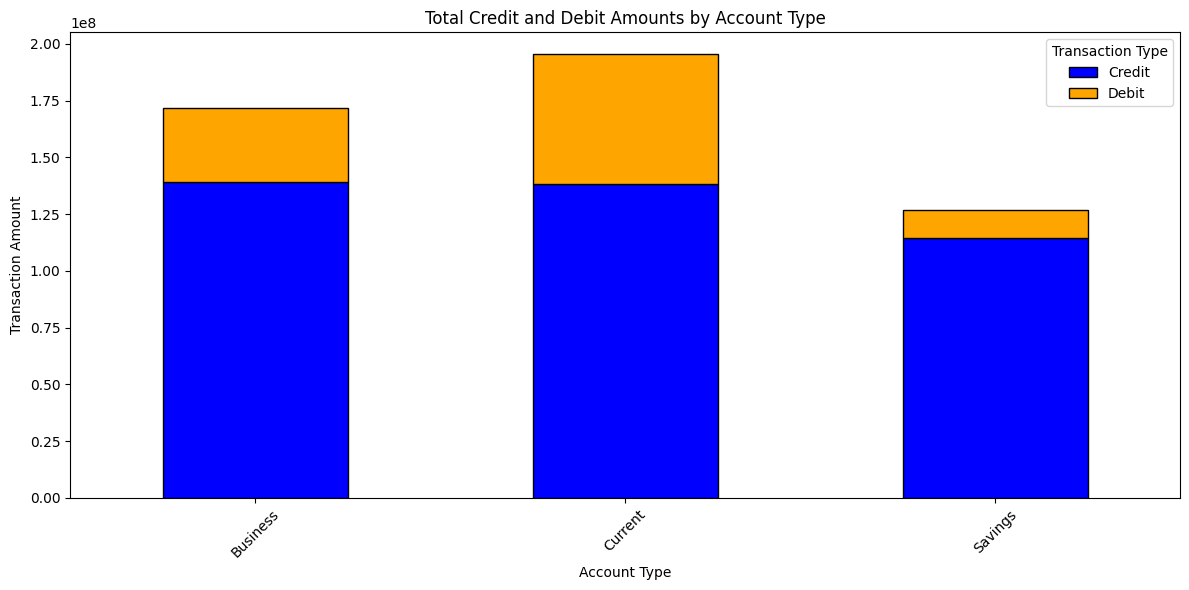

In [57]:
#Task 7
account_type_grouped = data.groupby('Account Type')[['Credit', 'Debit']].sum()

#STACKED BAR CHART
plt.figure(figsize=(12, 6))
account_type_grouped.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['blue', 'orange'], 
    edgecolor='black'
)
plt.title('Total Credit and Debit Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(['Credit', 'Debit'], title='Transaction Type')
plt.tight_layout()
plt.show()

In [60]:
# Explanation:
# This stacked bar chart displays the total credit and debit amounts for each account type. It helps compare how different account types contribute to the overall transaction volumes, which can guide marketing strategies or product decisions. Since the dataset didn’t have a 'Customer Type Description' column, 'Account Type' was used as a substitute for customer type. This approach still provides insights into the financial behavior of different account groups, even without specific customer type information.
# Insights: 
# The chart highlights account types with more inflows (Credit) and those with more outflows (Debit). It helps identify which account types handle the most transactions and shows the balance between Credit and Debit amounts.